In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import utils

In [2]:
df_accept = utils.parsing_openreview_hdf5()
df_accept.head()

,rating,decision,authors,title,mean_rating,var_rating
0,"[6, 6, 6]",Accept (Poster),b'Liyuan Liu#Haoming Jiang#Pengcheng He#Weizhu...,On The Variance Of The Adaptive Learning Rate ...,6.0,0.0
1,"[6, 6, 6]",Accept (Poster),b'Felix Hill#Andrew Lampinen#Rosalia Schneider...,Emergent Systematic Generalization In A Situat...,6.0,0.0
2,"[8, 8, 8]",Accept (Spotlight),b'Kailun Wu#Yiwen Guo#Ziang Li#Changshui Zhang',Sparse Coding With Gated Learned Ista,8.0,0.0
3,"[8, 8, 8]",Accept (Talk),b'Archit Sharma#Shixiang Gu#Sergey Levine#Vika...,Dynamics-aware Unsupervised Skill Discovery,8.0,0.0
4,"[6, 6, 6]",Accept (Poster),b'Pawel Korus#Nasir Memon',Quantifying The Cost Of Reliable Photo Authent...,6.0,0.0


In [3]:
with open("./data/googlescholar_paper_info_2022_04_15.json", 'r') as f:
    raw_citation = json.load(f)
print(len(raw_citation), len(df_accept))

687 687


In [4]:
for pn, val in raw_citation.items():
    df_accept.loc[df_accept.title == pn, "citations"] = val["num_citations"]
df_accept.head()

,rating,decision,authors,title,mean_rating,var_rating,citations
0,"[6, 6, 6]",Accept (Poster),b'Liyuan Liu#Haoming Jiang#Pengcheng He#Weizhu...,On The Variance Of The Adaptive Learning Rate ...,6.0,0.0,902.0
1,"[6, 6, 6]",Accept (Poster),b'Felix Hill#Andrew Lampinen#Rosalia Schneider...,Emergent Systematic Generalization In A Situat...,6.0,0.0,21.0
2,"[8, 8, 8]",Accept (Spotlight),b'Kailun Wu#Yiwen Guo#Ziang Li#Changshui Zhang',Sparse Coding With Gated Learned Ista,8.0,0.0,29.0
3,"[8, 8, 8]",Accept (Talk),b'Archit Sharma#Shixiang Gu#Sergey Levine#Vika...,Dynamics-aware Unsupervised Skill Discovery,8.0,0.0,4.0
4,"[6, 6, 6]",Accept (Poster),b'Pawel Korus#Nasir Memon',Quantifying The Cost Of Reliable Photo Authent...,6.0,0.0,0.0


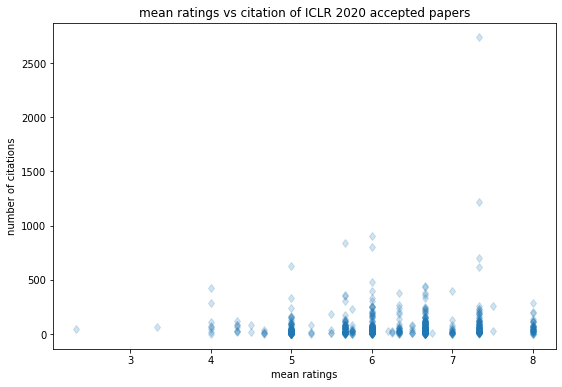

In [5]:
plt.figure(figsize=(9, 6))
plt.plot(df_accept.mean_rating, df_accept.citations, 'd', alpha=0.2)
plt.xlabel("mean ratings")
plt.ylabel("number of citations")
plt.title("mean ratings vs citation of ICLR 2020 accepted papers")
plt.show()

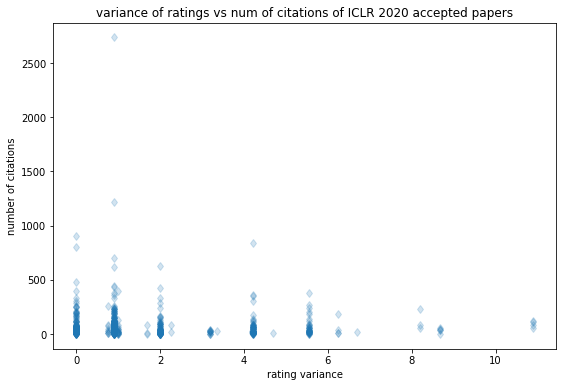

In [6]:
plt.figure(figsize=(9, 6))
plt.plot(df_accept.var_rating, df_accept.citations, 'd', alpha=0.2)
plt.xlabel("rating variance")
plt.ylabel("number of citations")
plt.title("variance of ratings vs num of citations of ICLR 2020 accepted papers")
plt.show()

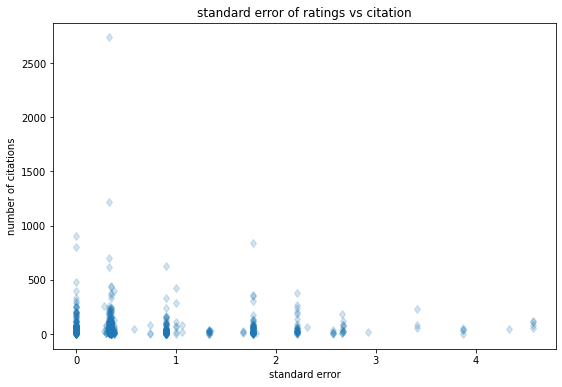

In [7]:
plt.figure(figsize=(9, 6))
standard_error = df_accept.var_rating / np.sqrt(df_accept.mean_rating)
plt.plot(standard_error, df_accept.citations, 'd', alpha=0.2)
plt.xlabel("standard error")
plt.ylabel("number of citations")
plt.title("standard error of ratings vs citation")
plt.show()

In [27]:
df_accept.sort_values(by="citations", ascending=False).reset_index(drop=True).loc[0].title

'Albert: A Lite Bert For Self-supervised Learning Of Language Representations'

In [25]:
df_accept.sort_values(by="citations", ascending=False)

,rating,decision,authors,title,mean_rating,var_rating,citations
686,"[8, 8, 6]",Accept (Spotlight),b'Zhenzhong Lan#Mingda Chen#Sebastian Goodman#...,Albert: A Lite Bert For Self-supervised Learni...,7.333333,0.888889,2736.0
627,"[8, 8, 6]",Accept (Poster),b'Kevin Clark#Minh-thang Luong#Quoc V. Le#Chri...,Electra: Pre-training Text Encoders As Discrim...,7.333333,0.888889,1214.0
0,"[6, 6, 6]",Accept (Poster),b'Liyuan Liu#Haoming Jiang#Pengcheng He#Weizhu...,On The Variance Of The Adaptive Learning Rate ...,6.000000,0.000000,902.0
323,"[6, 3, 8]",Accept (Poster),b'Tianyi Zhang*#Varsha Kishore*#Felix Wu*#Kili...,Bertscore: Evaluating Text Generation With Bert,5.666667,4.222222,837.0
541,"[6, 6, 6]",Accept (Poster),b'Ari Holtzman#Jan Buys#Leo Du#Maxwell Forbes#...,The Curious Case Of Neural Text Degeneration,6.000000,0.000000,801.0
...,...,...,...,...,...,...,...
668,"[3, 6, 8, 6]",Accept (Poster),b'Rajesh Jayaram#David P. Woodruff#Qiuyi Zhang',Span Recovery For Deep Neural Networks With Ap...,5.750000,3.187500,1.0
584,"[8, 8, 3]",Accept (Poster),b'Chungkuk Yoo#Bumsoo Kang#Minsik Cho',Snow: Subscribing To Knowledge Via Channel Poo...,6.333333,5.555556,1.0
4,"[6, 6, 6]",Accept (Poster),b'Pawel Korus#Nasir Memon',Quantifying The Cost Of Reliable Photo Authent...,6.000000,0.000000,0.0
333,"[6, 6, 6]",Accept (Poster),b'Baoxiang Wang#Shuai Li#Jiajin Li#Siu On Chan',The Gambler's Problem And Beyond,6.000000,0.000000,0.0
